# Medical Insurance Price Prediction using Machine Learning – Python

You must have heard some advertisements regarding medical insurance that promises to help financially in case of any medical emergency. One who purchases this type of insurance has to pay premiums monthly and this premium amount varies vastly depending upon various factors. 

## Types of insurance

## Medical Insurance Price Prediction using Machine Learning in Python

In this article, we will try to extract some insights from a dataset that contains details about the background of a person who is purchasing medical insurance along with what amount of premium is charged to those individuals as well using Machine Learning in Python.

### Importing Libraries and Dataset

Python libraries make it very easy for us to handle the data and perform typical and complex tasks with a single line of code.

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import warnings
warnings.filterwarnings("ignore")


C:\Users\USER\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Now let’s use the panda’s data frame to load the dataset and look at the first five rows of it.

In [2]:
#Loading the data
df=pd.read_csv("C:/Users/USER/Desktop/rene/insurance.csv")
df


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


Now, we can observe the data and its shape(rows x columns)

This dataset contains 1338 data points with 6 independent features and 1 target feature(expenses).

In [3]:
#getting information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the above, we can see that the dataset contains 2 columns with float values 3 with categorical values and the rest contains integer values.

In [4]:
#describing the dataset
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


We can look at the descriptive statistical measures of the continuous data available in the dataset

## Exploratory Data Analysis

EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. While performing the EDA of this dataset we will try to look at what is the relation between the independent features that is how one affects the other.

In [5]:
#identifying null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

So, here we can conclude that there are no null values in the dataset given.

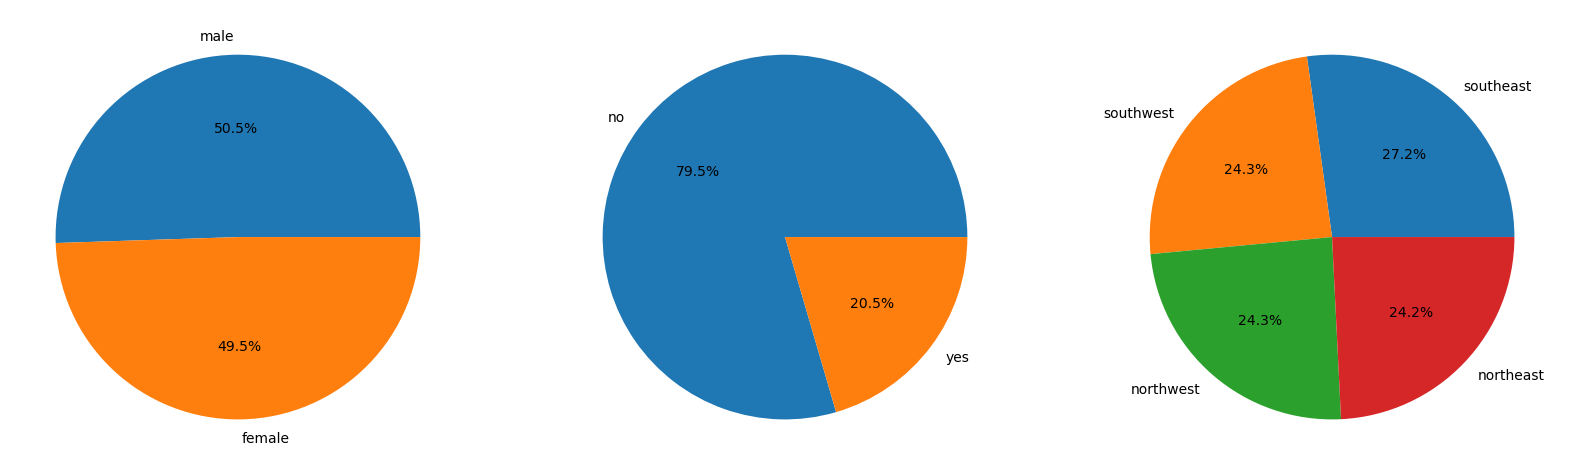

In [6]:
#visualizeing the dataset using the matplotlib
import matplotlib.pyplot as plt
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = df[col].value_counts()
    #visualizeing the subplot of pie charts
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
plt.show()


The data provided to us is equally distributed among the sex and the region columns but in the smoker column, we can observe a ratio of 79.5:20.5.

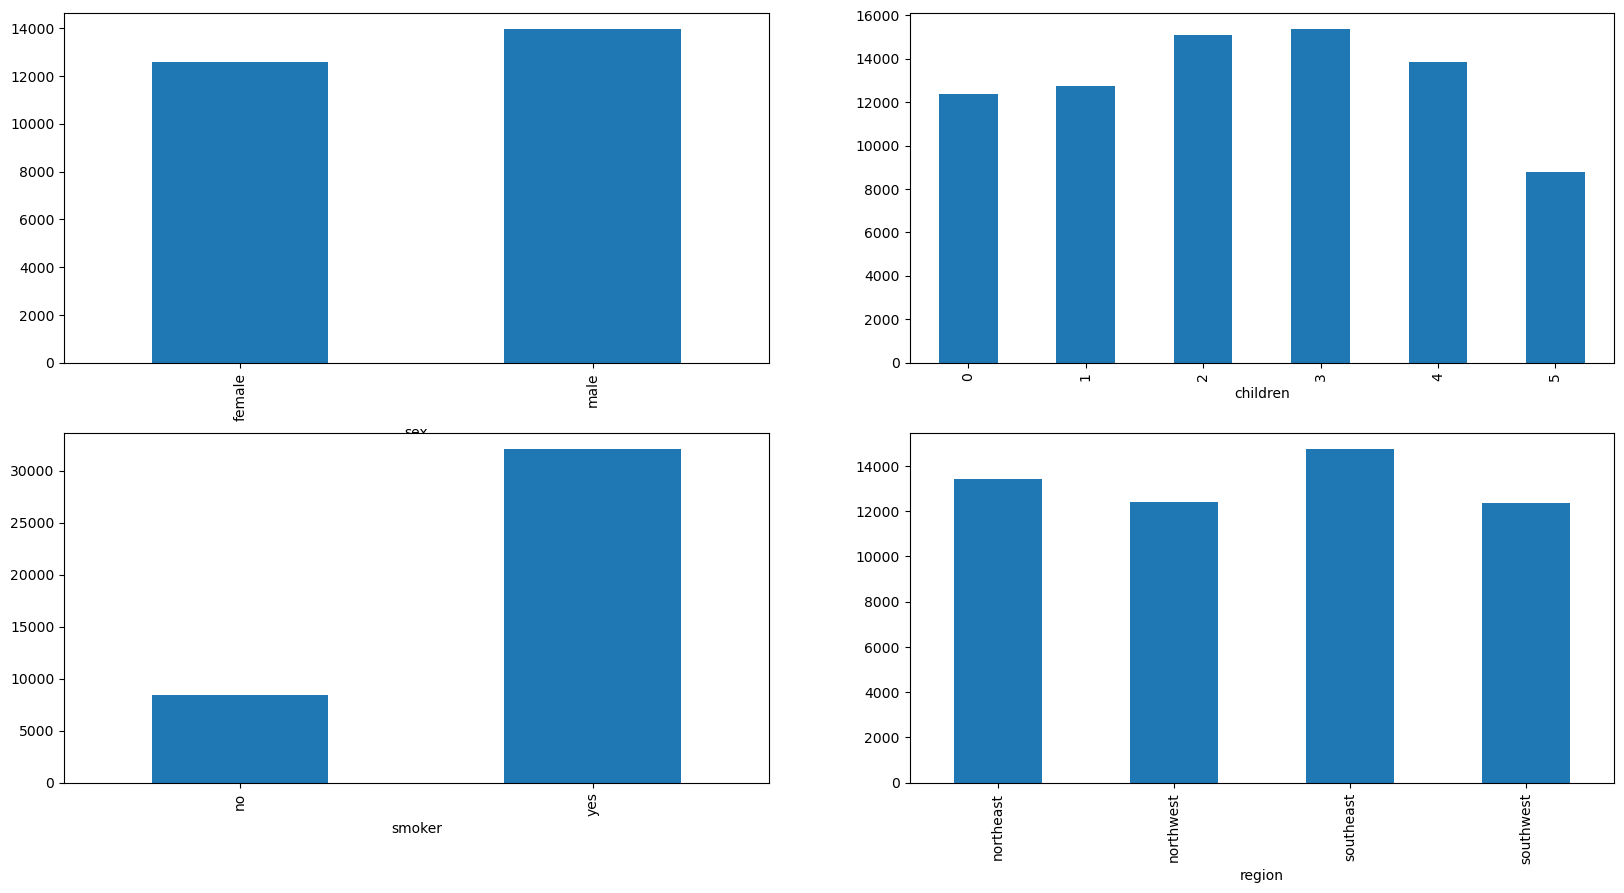

In [7]:
features = ['sex', 'children', 'smoker', 'region']
#visulazeing the subplot of bar graphs
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['expenses'].mean().astype(float).plot.bar()
plt.show()



Now let’s look at some of the observations which are shown in the above graphs:

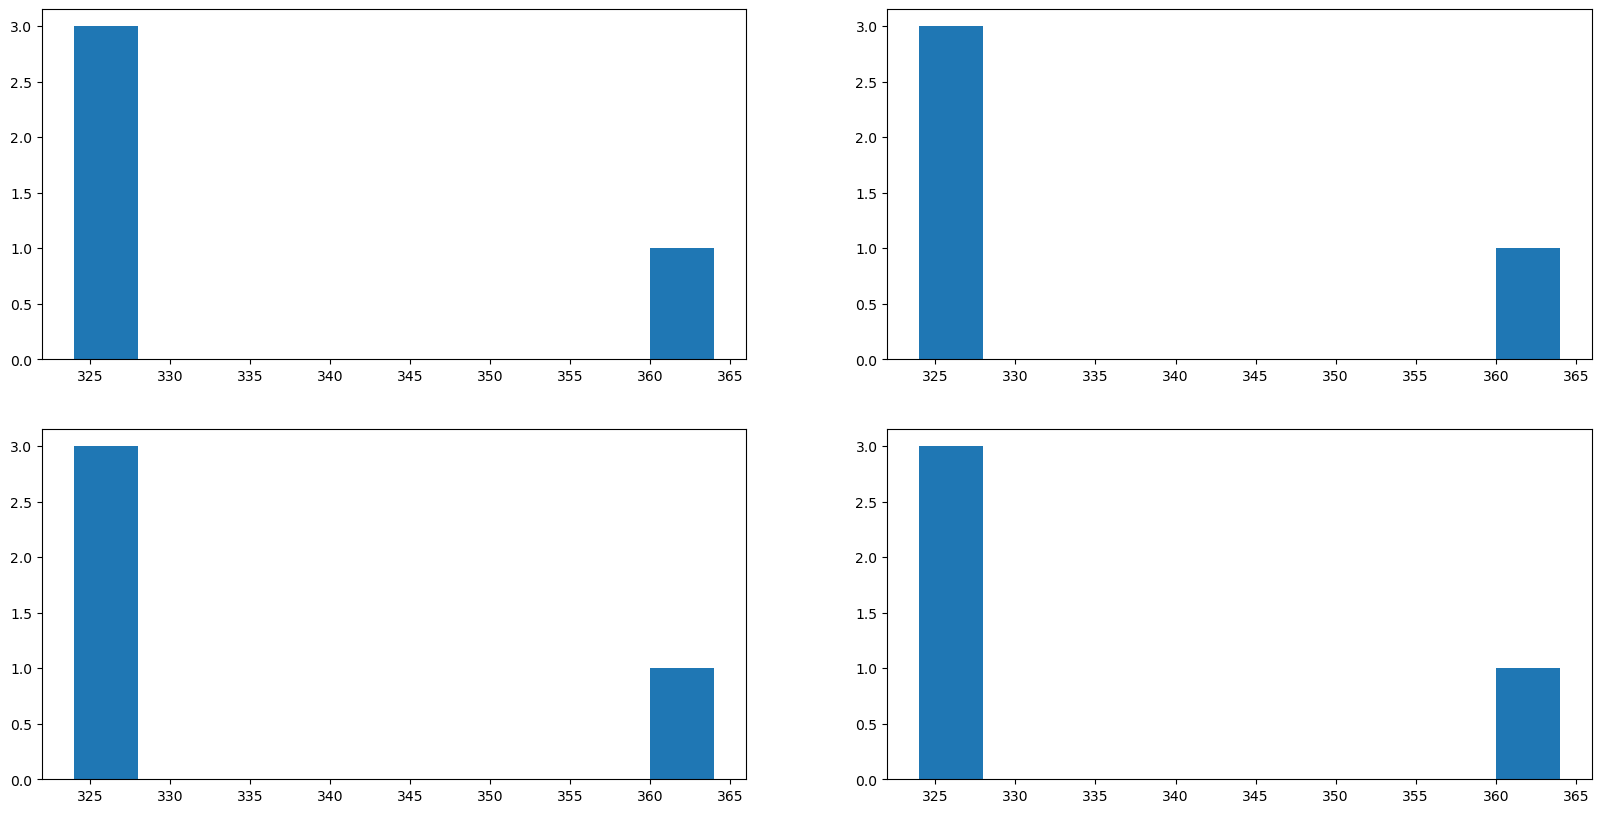

In [8]:
features = ['sex', 'children', 'smoker', 'region']
#visulazeing the subplot of histogram graphs
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['expenses'].mean().astype(float)
    plt.hist(x)
plt.show()


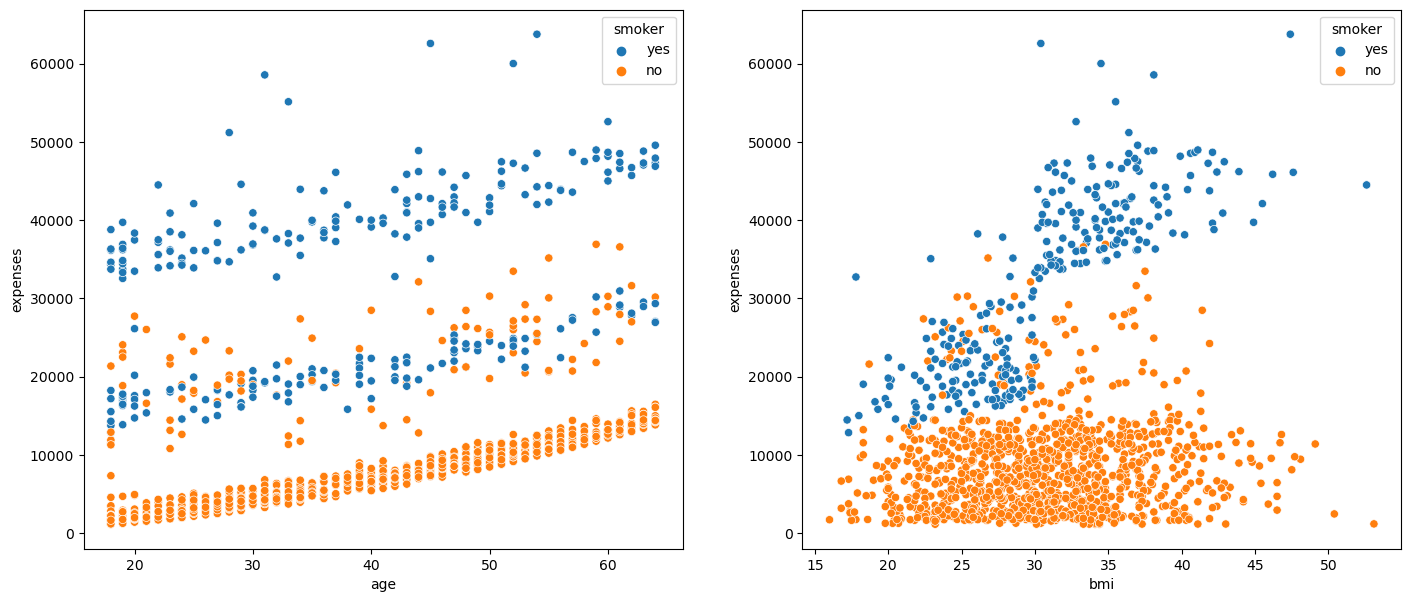

In [9]:
#importing seaborn
import seaborn as sns

features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col,y='expenses',hue='smoker')
plt.show()

A clear distinction can be observed here between the charges that smokers have to pay. Also here as well we can observe that as the age of a person increases premium prices goes up as well.

### DATA PREPROCESSING

Data preprocessing is technique to clean the unusual data like the missing values,wrong data,wrong format of data,duplicated data and the outliers.In this data we can observe that there are no missing values and wrong data.The only thing we can need to check is for duplicates and presence of outliers.

<Axes: >

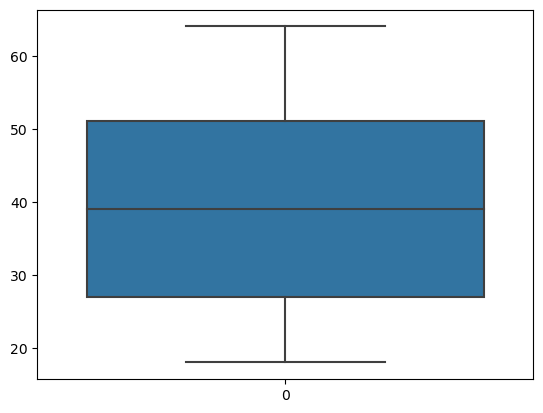

In [10]:
#droping the duplicates
df.drop_duplicates(inplace=True)
#identifying the outlier of age using boxplot
sns.boxplot(df['age'])

we can see that there are no outliers present in age column

<Axes: >

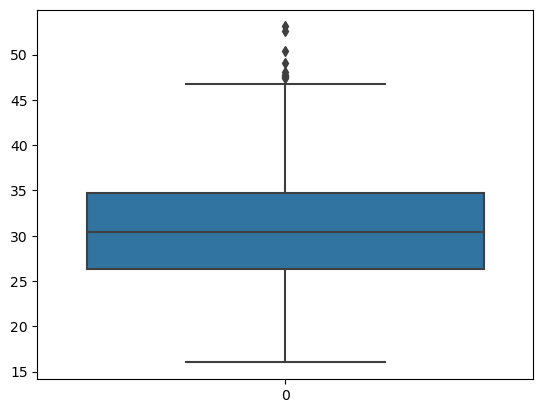

In [11]:
#identifying the outlier of bmi using boxplot
sns.boxplot(df['bmi'])

Due to the presence of outliers present in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.

In [12]:
# identifying mean using inter quantile
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.699999999999998
47.300000000000004


In [13]:
pip install feature_engine

Note: you may need to restart the kernel to use updated packages.


<Axes: >

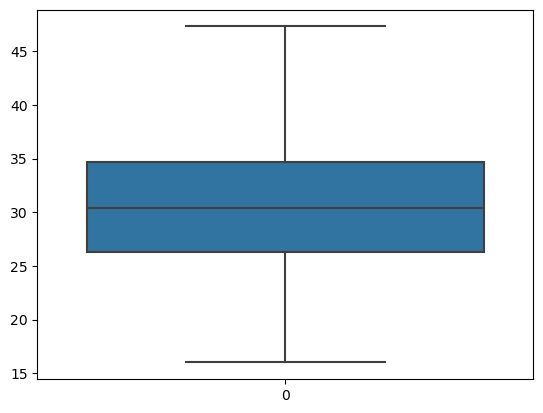

In [14]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.699},max_capping_dict={'bmi':47.300})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

Now we successfully treated the outliers .

### Data Wrangling

Data wrangling is a technique to ensure whether the data follow normal or standard distribution and encode the discrete data for prediction.

In [15]:
#identifying skewness of bmi
df['bmi'].skew()

0.23313196120545965

In [16]:
#identifying skewness of age
df['age'].skew()

0.054780773126998195

Data in both the age and BMI column approximately follow a Normal distribution which is a good point with respect to the model’s learning.

In [17]:
df1=pd.read_csv("C:/Users/USER/Desktop/rene/insurance.csv")
df1['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

### Encoding

encoding is to be done for discrete categorical data (sex,bmi,region).

In [18]:
#changing caterogical value into numerical value
df['sex']=df1['sex'].map({'male':0,'female':1})
df['smoker']=df1['smoker'].map({'yes':1,'no':0})
df['region']=df1['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})
df

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,3,16884.92
1,18,0,33.8,1,0,2,1725.55
2,28,0,33.0,3,0,2,4449.46
3,33,0,22.7,0,0,0,21984.47
4,32,0,28.9,0,0,0,3866.86
...,...,...,...,...,...,...,...
1333,50,0,31.0,3,0,0,10600.55
1334,18,1,31.9,0,0,1,2205.98
1335,18,1,36.9,0,0,2,1629.83
1336,21,1,25.8,0,0,3,2007.95


Now the discrete data is encoded and the data preprocessing and data wrangling part is completed.Now we can go for model development.

In [19]:
#identifying correlation
df.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,0.019814,0.112074,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.044840,-0.017848,-0.076596,-0.008998,-0.058045
bmi,0.112074,-0.044840,1.000000,0.013578,0.003364,0.156838,0.199296
children,0.041536,-0.017848,0.013578,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003364,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156838,-0.002842,0.012736,1.000000,0.010767
expenses,0.298308,-0.058045,0.199296,0.067389,0.787234,0.010767,1.000000


### Model Development

There are so many state-of-the-art ML models available in academia but some model fits better to some problem while some fit better than other. So, to make this decision we split our data into training and validation data. Then we use the validation data to choose the model with the highest performance.

In [20]:
#assgining values to x and y 
X=df.drop(['expenses'],axis=1)
Y=df[['expenses']]
#importing models
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
#splitting the dataset
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
l1=[]
l2=[]
l3=[]
cvs=0
# assinging training and testing data to the models
for i in range(40,50):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
    lrmodel=LinearRegression()
    lrmodel.fit(xtrain,ytrain)
    l1.append(lrmodel.score(xtrain,ytrain))
    l2.append(lrmodel.score(xtest,ytest))
    cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
    l3.append(cvs)
df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
df1

,train acc,test acc,cvs
0,0.741683,0.778390,0.747086
1,0.756416,0.706280,0.747086
2,0.729569,0.806222,0.747086
3,0.754273,0.732814,0.747086
4,0.742986,0.779584,0.747086
5,0.753297,0.731777,0.747086
6,0.741278,0.776466,0.747086
7,0.731965,0.796159,0.747086
8,0.751938,0.741722,0.747086
9,0.756363,0.722583,0.747086


After dividing the data into training and validation data it is considered a better practice to achieve stable and fast training of the model.We have identified the best random_state number for this data set as 42 .Now we fix this random_state and try with different ml algorithms for better score or accuracy.

Now let’s train some state-of-the-art machine learning models on the training data and then use the validation data for choosing the best out of them for prediction.

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
# fiiting xtrain and ytrain into linear regression model
lrmodel.fit(xtrain,ytrain)
# identifying score values of the model
print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,X,Y,cv=5,).mean())

0.7295687237027799
0.8062218730267346
0.7470864713068941


In [22]:
from sklearn.metrics import r2_score
svrmodel=SVR()
# fiiting xtrain and ytrain into svr  model
svrmodel.fit(xtrain,ytrain)
# predicting the training and testing dataset
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain1))
print(r2_score(ytest,ypredtest1))
print(cross_val_score(svrmodel,X,Y,cv=5,).mean())

-0.10151557584778148
-0.13444635819274087
-0.10374610453636417


In [23]:
#importing model RandomForestRegressor,GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
rfmodel=RandomForestRegressor(random_state=42)
# fitting xtrain and ytrain into random forest model
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
# predicting the score of the model random forest
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())

0.9738601477948087
0.8816654160106289
0.8365619819224026


In [24]:
# using the parameter  GridSearchCV estimate the random state of 42 in the random forest model
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
#identifying best params
print(grid.best_params_)

{'n_estimators': 120}


In [25]:
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
# fitting xtrain and ytrain into random forest model
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
#using the grid.best params of random state=42 identify the score values in the randomforest model 
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())

0.9746923328436323
0.8819750300066196
0.8371954139613653


In [26]:
# predicting score value  in the GradientBoost model
gbmodel=GradientBoostingRegressor()
#fitting xtrain and ytrain into GradientBoost model
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
# identifying score values  in the GradientBoost model
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())

0.8903912282468484
0.9006010248264397
0.8554990168892406


In [27]:
# using the parameter GridSearch estimate  the value in the GradientBoost model
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

{'learning_rate': 0.2, 'n_estimators': 19}


In [28]:
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
#fitting xtrain and ytrain into GradientBoost model
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
#using the grid.best params identify the score values in the GradientBoost model
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())


0.8668967296432014
0.901260150507639
0.860778961577009


In [31]:
#installing  xgboost
!pip install xgboost

In [32]:
#importing  XGBRegressor
from xgboost import XGBRegressor

In [33]:
xgmodel=XGBRegressor()
#fitting xtrain and ytrain into XGBRegressor model
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
# predicting the score values
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())



0.9953575134277344
0.8656051754951477
0.8087373733520508


In [34]:
# using the parameter GridSearch estimate  the value in the XGBRegressor model
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}


In [35]:
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
# fitting xtrain and ytrain into XGBRegressor model
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
#using the grid.best params identify the score values in the XGBRegressor model
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())


0.8699851632118225
0.9016817212104797
0.8600637793540955


### Comapring All Models

From the above table we can observe that XGBoost is the best model.Now we need to identify the important features for predicting of charges.

In [36]:
# important score from  the best estimator
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats

,Importance
age,0.039921
sex,0.000000
bmi,0.126126
children,0.012205
smoker,0.817423
region,0.004324


In [37]:
# important score >0.01
important_features=feats[feats['Importance']>0.01]
important_features


,Importance
age,0.039921
bmi,0.126126
children,0.012205
smoker,0.817423


#### Final Model

In [38]:
df.drop(df[['sex','region']],axis=1,inplace=True)
Xf=df.drop(df[['expenses']],axis=1)
X=df.drop(df[['expenses']],axis=1)
# train and test the data
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=42)
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
#fitting xtrain and ytrain into final model
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)
#predicting score of final model
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(finalmodel,X,Y,cv=5,).mean())

0.8685410618782043
0.9013273119926453
0.860429310798645


### Save Model:

In [39]:
#importing dump for saving the file
from pickle import dump

# Save the model to a file
with open('insurancemodelf.pkl', 'wb') as file:
    dump(finalmodel, file)


### Predict on new data:

In [40]:
#creating new dataframe
new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,
                       'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)

array([18295.182], dtype=float32)

## Conclusion

Out of all the models XGBoost model is giving the highest accuracy this means predictions made by this model are close to the real values as compared to the other model.

The dataset we have used here was small still the conclusion we drew from them were quite similar to what is observed in the real-life scenario. If we would have a bigger dataset then we will be able to learn even deeper patterns in the relation between the independent features and the premium charged from the buyers.